# Questions I wanna find out,

1) Does outshooting your opponent in 3s result = win?

2) Does making more 3s than your opponent = win?

3) Does having higher 3PT% than your opponent = win?

4) 3PT% >= 50% = win?

5) [BONUS] More assists than your opponent = win?

5 questions, I shall use 1 different technique for each question for illustration purposes.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB


%matplotlib inline

In [2]:
nba_csv = 'C:/Users/zheng/Desktop/Data Science/Presentations/Mod 5//nba.games.stats.csv'

nba = pd.read_csv(nba_csv)

nba.head()

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


# EDA

Perform some EDA first.

In [3]:
nba.isnull().sum()

Unnamed: 0                  0
Team                        0
Game                        0
Date                        0
Home                        0
Opponent                    0
WINorLOSS                   0
TeamPoints                  0
OpponentPoints              0
FieldGoals                  0
FieldGoalsAttempted         0
FieldGoals.                 0
X3PointShots                0
X3PointShotsAttempted       0
X3PointShots.               0
FreeThrows                  0
FreeThrowsAttempted         0
FreeThrows.                 0
OffRebounds                 0
TotalRebounds               0
Assists                     0
Steals                      0
Blocks                      0
Turnovers                   0
TotalFouls                  0
Opp.FieldGoals              0
Opp.FieldGoalsAttempted     0
Opp.FieldGoals.             0
Opp.3PointShots             0
Opp.3PointShotsAttempted    0
Opp.3PointShots.            0
Opp.FreeThrows              0
Opp.FreeThrowsAttempted     0
Opp.FreeTh

In [4]:
nba.dtypes

Unnamed: 0                    int64
Team                         object
Game                          int64
Date                         object
Home                         object
Opponent                     object
WINorLOSS                    object
TeamPoints                    int64
OpponentPoints                int64
FieldGoals                    int64
FieldGoalsAttempted           int64
FieldGoals.                 float64
X3PointShots                  int64
X3PointShotsAttempted         int64
X3PointShots.               float64
FreeThrows                    int64
FreeThrowsAttempted           int64
FreeThrows.                 float64
OffRebounds                   int64
TotalRebounds                 int64
Assists                       int64
Steals                        int64
Blocks                        int64
Turnovers                     int64
TotalFouls                    int64
Opp.FieldGoals                int64
Opp.FieldGoalsAttempted       int64
Opp.FieldGoals.             

In [5]:
nba.shape

(9840, 41)

In [6]:
# convert date to datetime, make them as index as well

In [7]:
nba = nba[['Date', 'WINorLOSS', 'X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.', 'Opp.3PointShots', 'Opp.3PointShotsAttempted', 'Opp.3PointShots.' ]]

In [8]:
nba.head()

,Date,WINorLOSS,X3PointShots,X3PointShotsAttempted,X3PointShots.,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.
0,2014-10-29,L,13,22,0.591,8,26,0.308
1,2014-11-01,W,7,20,0.350,12,32,0.375
2,2014-11-05,L,8,25,0.320,5,17,0.294
3,2014-11-07,L,13,33,0.394,6,21,0.286
4,2014-11-08,W,9,22,0.409,8,21,0.381


In [9]:
nba['Date'] = pd.to_datetime(nba['Date'], format = '%Y-%m-%d')

In [10]:
nba = nba.set_index('Date')

In [11]:
nba.head()

,WINorLOSS,X3PointShots,X3PointShotsAttempted,X3PointShots.,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.
Date,,,,,,,
2014-10-29,L,13,22,0.591,8,26,0.308
2014-11-01,W,7,20,0.350,12,32,0.375
2014-11-05,L,8,25,0.320,5,17,0.294
2014-11-07,L,13,33,0.394,6,21,0.286
2014-11-08,W,9,22,0.409,8,21,0.381


In [12]:
#set dummy variable for WINLOSS

In [13]:
nba = pd.get_dummies(nba, columns=['WINorLOSS'], prefix=['WINorLOSS'])

In [14]:
nba.head()

,X3PointShots,X3PointShotsAttempted,X3PointShots.,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.,WINorLOSS_L,WINorLOSS_W
Date,,,,,,,,
2014-10-29,13,22,0.591,8,26,0.308,1,0
2014-11-01,7,20,0.350,12,32,0.375,0,1
2014-11-05,8,25,0.320,5,17,0.294,1,0
2014-11-07,13,33,0.394,6,21,0.286,1,0
2014-11-08,9,22,0.409,8,21,0.381,0,1


In [15]:
nba.shape

(9840, 8)

In [16]:
nba.corr()

,X3PointShots,X3PointShotsAttempted,X3PointShots.,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.,WINorLOSS_L,WINorLOSS_W
X3PointShots,1.000000,0.747013,0.685878,0.086748,0.115195,0.004273,-0.240486,0.240486
X3PointShotsAttempted,0.747013,1.000000,0.068394,0.115195,0.142953,0.021016,-0.032582,0.032582
X3PointShots.,0.685878,0.068394,1.000000,0.004273,0.021016,-0.020231,-0.317418,0.317418
Opp.3PointShots,0.086748,0.115195,0.004273,1.000000,0.747013,0.685878,0.240486,-0.240486
Opp.3PointShotsAttempted,0.115195,0.142953,0.021016,0.747013,1.000000,0.068394,0.032582,-0.032582
Opp.3PointShots.,0.004273,0.021016,-0.020231,0.685878,0.068394,1.000000,0.317418,-0.317418
WINorLOSS_L,-0.240486,-0.032582,-0.317418,0.240486,0.032582,0.317418,1.000000,-1.000000
WINorLOSS_W,0.240486,0.032582,0.317418,-0.240486,-0.032582,-0.317418,-1.000000,1.000000


# Q1 

### Does outshooting your opponent in 3s result = win?



We shall use Linear Progression for this question

In [17]:
outshoot = nba['X3PointShotsAttempted'] > nba['Opp.3PointShotsAttempted']

In [18]:
nba_Q1 = nba[outshoot]

nba_Q1.head()

,X3PointShots,X3PointShotsAttempted,X3PointShots.,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.,WINorLOSS_L,WINorLOSS_W
Date,,,,,,,,
2014-11-05,8,25,0.320,5,17,0.294,1,0
2014-11-07,13,33,0.394,6,21,0.286,1,0
2014-11-08,9,22,0.409,8,21,0.381,0,1
2014-11-10,10,27,0.370,6,26,0.231,0,1
2014-11-14,11,28,0.393,10,21,0.476,0,1


In [19]:
X1 = nba_Q1[['X3PointShotsAttempted', 'Opp.3PointShotsAttempted']]
Y1 = nba_Q1['WINorLOSS_W']

In [20]:
X1

,X3PointShotsAttempted,Opp.3PointShotsAttempted
Date,,
2014-11-05,25,17
2014-11-07,33,21
2014-11-08,22,21
2014-11-10,27,26
2014-11-14,28,21
...,...,...
2018-03-14,32,26
2018-03-21,25,23
2018-03-29,32,21


In [21]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 1)

logreg = LogisticRegression()
logreg.fit(X1_train, Y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
logreg.intercept_

array([-2.88135651e-05])

In [23]:
logreg.coef_

array([[ 0.00555454, -0.0017728 ]])

In [24]:

y_pred1 = logreg.predict(X1_train)

accuracy_score_train = accuracy_score(Y1_train, y_pred1)

accuracy_score_train

0.5308674827035658

In [25]:
y_pred_test1 = logreg.predict(X1_test)
accuracy_score_test = accuracy_score(Y1_test, y_pred_test1)

accuracy_score_test

0.5085106382978724

In [26]:
cm = metrics.confusion_matrix(Y1_test, y_pred_test1)

print(cm)

[[  0 462]
 [  0 478]]


In [27]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

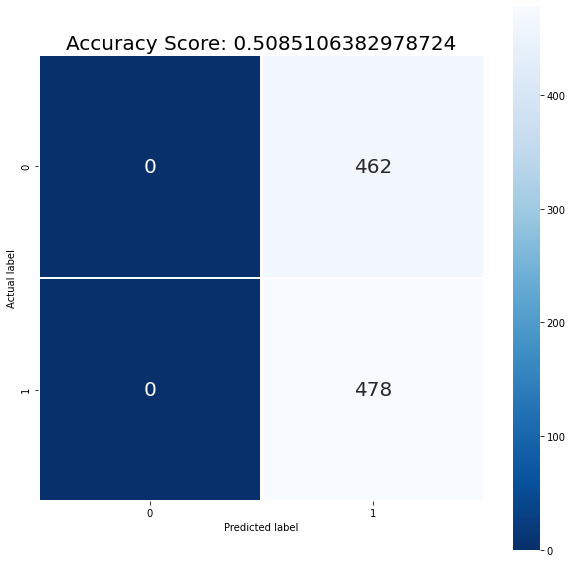

In [28]:
_ = plt.figure(figsize=(10,10))
_ = sns.heatmap(cm, annot=True, fmt='d', linewidths=2, square = True, cmap = 'Blues_r', annot_kws={"fontsize":20});
_ = plt.ylabel('Actual label');
_ = plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score_test)
_ = plt.title(all_sample_title, size = 20);

In [29]:
print(classification_report(Y1_test, y_pred_test1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       462
           1       0.51      1.00      0.67       478

    accuracy                           0.51       940
   macro avg       0.25      0.50      0.34       940
weighted avg       0.26      0.51      0.34       940



C:\Users\zheng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
logreg.predict_proba(X1_test)

array([[0.47556346, 0.52443654],
       [0.47323551, 0.52676449],
       [0.46746526, 0.53253474],
       ...,
       [0.47190991, 0.52809009],
       [0.47795138, 0.52204862],
       [0.47789246, 0.52210754]])

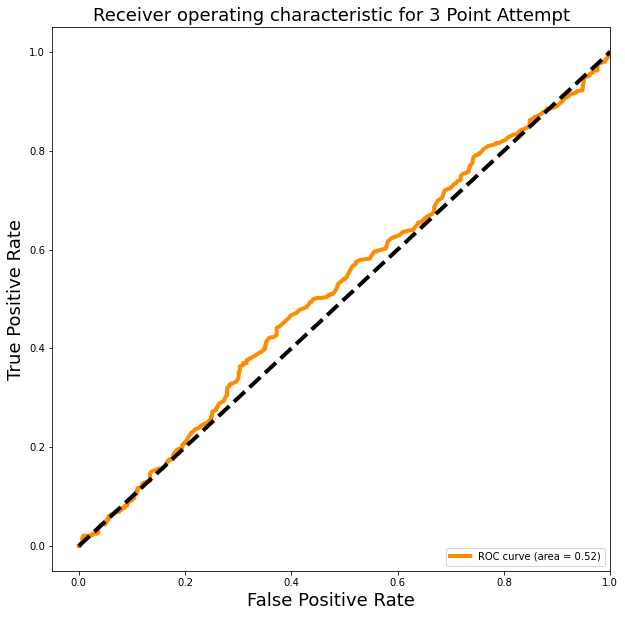

In [31]:
# For class 1, find the area under the curve
preds1 = logreg.predict_proba(X1_test)[:,1]
# Find fpr, tpr
fpr, tpr, _ = metrics.roc_curve(Y1_test, preds1)

# Find auc
roc_auc = metrics.auc(fpr, tpr)

# Plot of a ROC curve for class 1 (won the game)
plt.figure(figsize=[10,10])

# Plot fpr, tpr
plt.plot(fpr, tpr, color='darkorange', linewidth=4, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for 3 Point Attempt', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Q2

### Does making more 3s than your opponent = win?

We shall use SVM Linear for this question.

In [32]:
makemore = nba['X3PointShots'] > nba['Opp.3PointShots']

In [33]:
nba_Q2 = nba[makemore]

nba_Q2.head()

,X3PointShots,X3PointShotsAttempted,X3PointShots.,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.,WINorLOSS_L,WINorLOSS_W
Date,,,,,,,,
2014-10-29,13,22,0.591,8,26,0.308,1,0
2014-11-05,8,25,0.320,5,17,0.294,1,0
2014-11-07,13,33,0.394,6,21,0.286,1,0
2014-11-08,9,22,0.409,8,21,0.381,0,1
2014-11-10,10,27,0.370,6,26,0.231,0,1


In [34]:
X2 = nba_Q2['X3PointShots'].values.reshape(-1,1)
Y2 = nba_Q2['WINorLOSS_W']

In [35]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 1)

In [36]:
clf = svm.SVC(kernel = 'linear', C = 1000, probability=True)
clf.fit(X2_train, Y2_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [37]:
y_pred2 = clf.predict(X2_test)

In [38]:
accuracy_score_train2 = clf.score(X2_train,Y2_train)

In [39]:
clf.score(X2_test,Y2_test)

0.6467991169977925

In [40]:
cm2 = metrics.confusion_matrix(Y2_test, y_pred2)

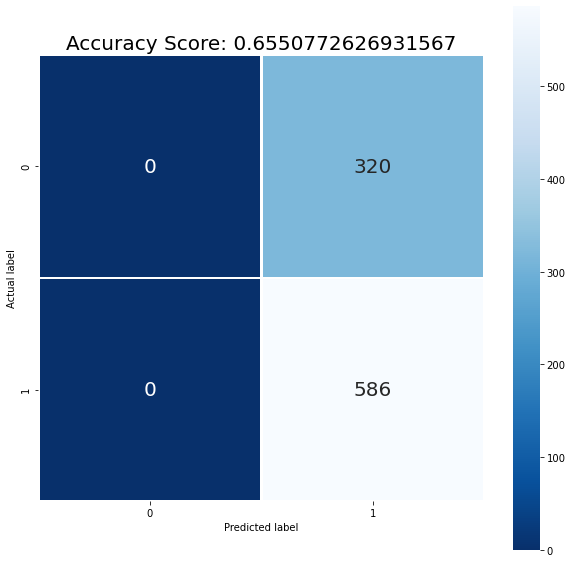

In [41]:
_ = plt.figure(figsize=(10,10))
_ = sns.heatmap(cm2, annot=True, fmt='d', linewidths=2, square = True, cmap = 'Blues_r', annot_kws={"fontsize":20});
_ = plt.ylabel('Actual label');
_ = plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score_train2)
_ = plt.title(all_sample_title, size = 20);

In [42]:
print(classification_report(Y2_test, y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       320
           1       0.65      1.00      0.79       586

    accuracy                           0.65       906
   macro avg       0.32      0.50      0.39       906
weighted avg       0.42      0.65      0.51       906



C:\Users\zheng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
X2_train

array([[10],
       [10],
       [13],
       ...,
       [12],
       [ 9],
       [14]], dtype=int64)

In [44]:
clf.predict_proba(X2_test)

array([[0.3416686, 0.6583314],
       [0.3416686, 0.6583314],
       [0.3416686, 0.6583314],
       ...,
       [0.3416686, 0.6583314],
       [0.3416686, 0.6583314],
       [0.3416686, 0.6583314]])

In [45]:
clf.predict(X2_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

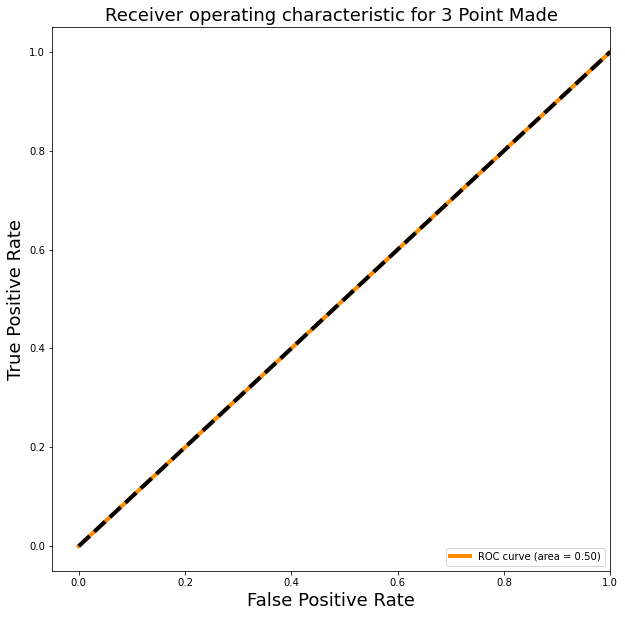

In [46]:
# For class 1, find the area under the curve
preds2 = clf.predict_proba(X2_test)[:,1]
# Find fpr, tpr
fpr, tpr, _ = metrics.roc_curve(Y2_test, preds2)

# Find auc
roc_auc = metrics.auc(fpr, tpr)

# Plot of a ROC curve for class 1 (won the game)
plt.figure(figsize=[10,10])

# Plot fpr, tpr
plt.plot(fpr, tpr, color='darkorange', linewidth=4, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for 3 Point Made', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Q3

### Does having higher 3PT% than your opponent = win?

We shall use non-linear SVM for this question.

In [47]:
shootbetter = nba['X3PointShots.'] > nba['Opp.3PointShots.']

In [48]:
nba_Q3 = nba[shootbetter]

nba_Q3.head()

,X3PointShots,X3PointShotsAttempted,X3PointShots.,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.,WINorLOSS_L,WINorLOSS_W
Date,,,,,,,,
2014-10-29,13,22,0.591,8,26,0.308,1,0
2014-11-05,8,25,0.320,5,17,0.294,1,0
2014-11-07,13,33,0.394,6,21,0.286,1,0
2014-11-08,9,22,0.409,8,21,0.381,0,1
2014-11-10,10,27,0.370,6,26,0.231,0,1


In [49]:
X3 = nba_Q2['X3PointShots.'].values.reshape(-1,1)
Y3 = nba_Q2['WINorLOSS_W']

In [50]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size = 0.2, random_state = 1)

In [51]:
X3_test

array([[0.455],
       [0.4  ],
       [0.385],
       [0.292],
       [0.433],
       [0.415],
       [0.419],
       [0.424],
       [0.308],
       [0.55 ],
       [0.478],
       [0.4  ],
       [0.565],
       [0.308],
       [0.423],
       [0.364],
       [0.3  ],
       [0.313],
       [0.522],
       [0.433],
       [0.5  ],
       [0.565],
       [0.5  ],
       [0.364],
       [0.313],
       [0.565],
       [0.405],
       [0.405],
       [0.286],
       [0.348],
       [0.39 ],
       [0.424],
       [0.591],
       [0.28 ],
       [0.444],
       [0.267],
       [0.375],
       [0.333],
       [0.353],
       [0.406],
       [0.333],
       [0.393],
       [0.391],
       [0.19 ],
       [0.333],
       [0.343],
       [0.423],
       [0.389],
       [0.583],
       [0.48 ],
       [0.538],
       [0.514],
       [0.333],
       [0.353],
       [0.433],
       [0.6  ],
       [0.357],
       [0.333],
       [0.368],
       [0.433],
       [0.4  ],
       [0.379],
       [

In [52]:
clf1 = svm.NuSVC(probability=True)
clf1.fit(X3_train, Y3_train)

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=True, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

In [53]:
y_pred3 = clf1.predict(X3_test)

In [54]:
accuracy_score_train3 = clf1.score(X3_train,Y3_train)

print(accuracy_score_train3)

0.5466335540838853


In [55]:
clf1.score(X3_test, Y3_test)

0.5419426048565121

In [56]:
cm3 = metrics.confusion_matrix(Y3_test, y_pred3)

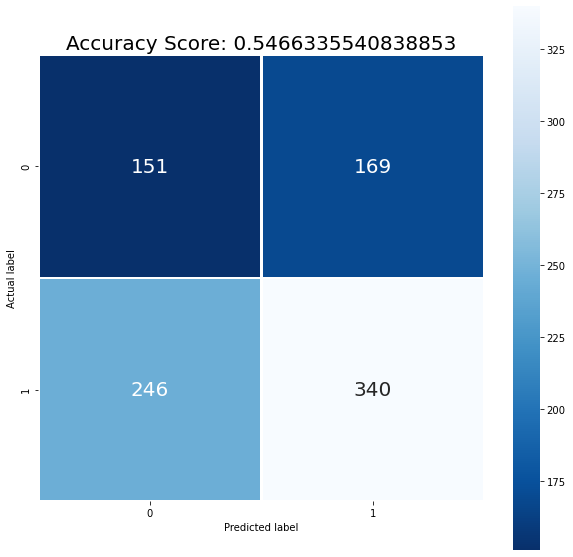

In [57]:
_ = plt.figure(figsize=(10,10))
_ = sns.heatmap(cm3, annot=True, fmt='d', linewidths=2, square = True, cmap = 'Blues_r', annot_kws={"fontsize":20});
_ = plt.ylabel('Actual label');
_ = plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score_train3)
_ = plt.title(all_sample_title, size = 20);

In [58]:
print(classification_report(Y3_test, y_pred3))

              precision    recall  f1-score   support

           0       0.38      0.47      0.42       320
           1       0.67      0.58      0.62       586

    accuracy                           0.54       906
   macro avg       0.52      0.53      0.52       906
weighted avg       0.57      0.54      0.55       906



In [59]:
clf1.predict_proba(X3_test)

array([[0.34404291, 0.65595709],
       [0.34518696, 0.65481304],
       [0.34447573, 0.65552427],
       ...,
       [0.34502051, 0.65497949],
       [0.34546881, 0.65453119],
       [0.3460589 , 0.6539411 ]])

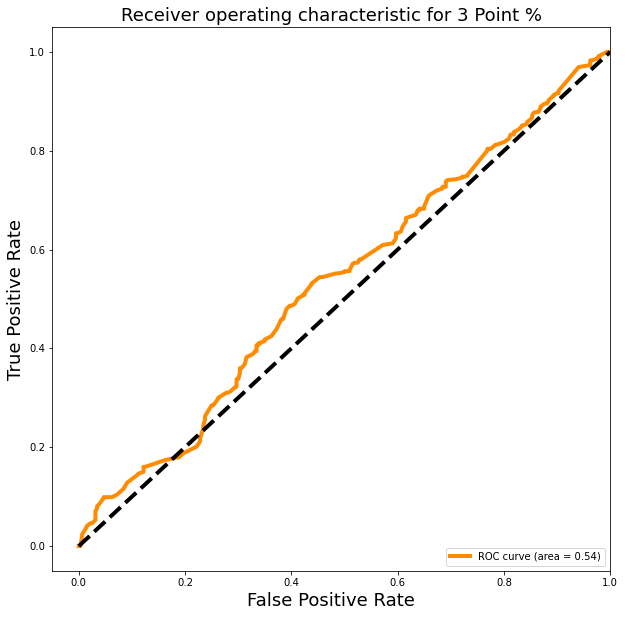

In [60]:
# For class 1, find the area under the curve
preds3 = clf1.predict_proba(X3_test)[:,1]
# Find fpr, tpr
fpr, tpr, _ = metrics.roc_curve(Y3_test, preds3)

# Find auc
roc_auc = metrics.auc(fpr, tpr)

# Plot of a ROC curve for class 1 (won the game)
plt.figure(figsize=[10,10])

# Plot fpr, tpr
plt.plot(fpr, tpr, color='darkorange', linewidth=4, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for 3 Point %', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Q4

### 3PT% >= 50% = win?

We shall use Naive Bayes to tackle this question.

In [61]:
shoot_well = nba['X3PointShots.'] >= 0.500

In [62]:
nba_Q4 = nba[shoot_well]

nba_Q4.head()

,X3PointShots,X3PointShotsAttempted,X3PointShots.,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.,WINorLOSS_L,WINorLOSS_W
Date,,,,,,,,
2014-10-29,13,22,0.591,8,26,0.308,1,0
2014-11-29,12,23,0.522,5,23,0.217,0,1
2014-12-17,16,28,0.571,8,30,0.267,0,1
2014-12-23,12,23,0.522,11,29,0.379,0,1
2015-01-07,13,25,0.520,5,17,0.294,0,1


In [63]:
X4 = nba_Q4['X3PointShots.'].values.reshape(-1,1)
Y4 = nba_Q4['WINorLOSS_W']

In [64]:
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size = 0.2, random_state = 1)

In [65]:
gnb = GaussianNB()
y_pred4 = gnb.fit(X4_train, Y4_train).predict(X4_test)
print("Number of mislabeled points out of a total %d points : %d" % (X4_test.shape[0], (Y4_test != y_pred4).sum()))

Number of mislabeled points out of a total 166 points : 28


In [66]:
accuracy_score_train4 = gnb.fit(X4_train, Y4_train).score(X4_train, Y4_train)

print(accuracy_score_train4)

0.7851739788199698


In [67]:
cm4 = metrics.confusion_matrix(Y4_test, y_pred4)

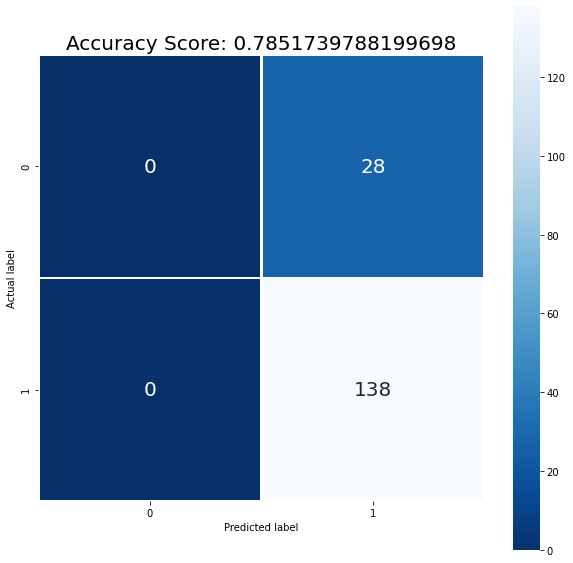

In [68]:
_ = plt.figure(figsize=(10,10))
_ = sns.heatmap(cm4, annot=True, fmt='d', linewidths=2, square = True, cmap = 'Blues_r', annot_kws={"fontsize":20});
_ = plt.ylabel('Actual label');
_ = plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score_train4)
_ = plt.title(all_sample_title, size = 20);

In [69]:
print(classification_report(Y4_test, y_pred4))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.83      1.00      0.91       138

    accuracy                           0.83       166
   macro avg       0.42      0.50      0.45       166
weighted avg       0.69      0.83      0.75       166



C:\Users\zheng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


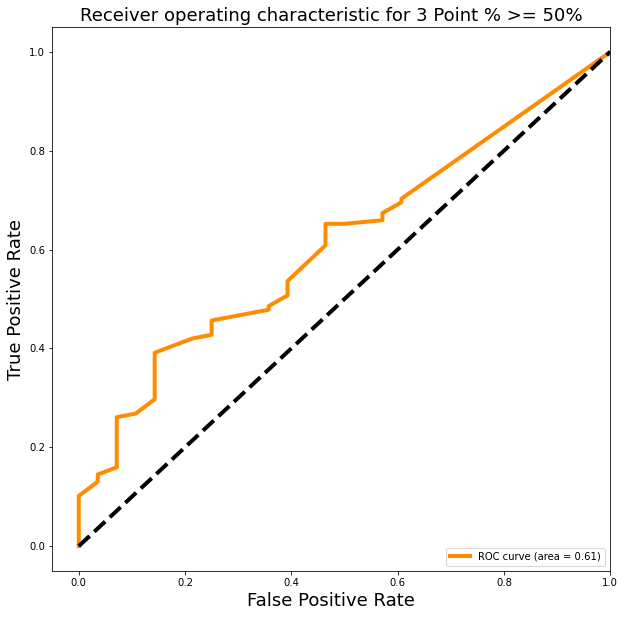

In [70]:
# For class 1, find the area under the curve
preds4 = gnb.predict_proba(X4_test)[:,1]
# Find fpr, tpr
fpr, tpr, _ = metrics.roc_curve(Y4_test, preds4)

# Find auc
roc_auc = metrics.auc(fpr, tpr)

# Plot of a ROC curve for class 1 (won the game)
plt.figure(figsize=[10,10])

# Plot fpr, tpr
plt.plot(fpr, tpr, color='darkorange', linewidth=4, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for 3 Point % >= 50%', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Q5

### [BONUS] More assists than your opponent = win?

In [71]:
nba_csv = 'C:/Users/zheng/Desktop/Data Science/Presentations/Mod 5//nba.games.stats.csv'

nba = pd.read_csv(nba_csv)

nba.head()

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


In [72]:
nba = nba[['WINorLOSS', 'Assists', 'Opp.Assists']]

In [73]:
nba.head()

,WINorLOSS,Assists,Opp.Assists
0,L,26,26
1,W,26,25
2,L,26,25
3,L,28,31
4,W,18,26


In [74]:
nba = pd.get_dummies(nba, columns=['WINorLOSS'], prefix=['WINorLOSS'])

In [75]:
nba.head()

,Assists,Opp.Assists,WINorLOSS_L,WINorLOSS_W
0,26,26,1,0
1,26,25,0,1
2,26,25,1,0
3,28,31,1,0
4,18,26,0,1


In [76]:
more_assists = nba['Assists'] > nba['Opp.Assists']

In [77]:
nba_Q5 = nba[more_assists]

In [78]:
nba_Q5.head()

,Assists,Opp.Assists,WINorLOSS_L,WINorLOSS_W
1,26,25,0,1
2,26,25,1,0
7,33,27,0,1
10,20,12,0,1
12,31,24,1,0


In [79]:
nba_Q5.shape

(4629, 4)

In [80]:
X5 = nba_Q5['Assists'].values.reshape(-1,1)
Y5 = nba_Q5['WINorLOSS_W']

In [81]:
X5_train, X5_test, Y5_train, Y5_test = train_test_split(X5, Y5, test_size = 0.2, random_state = 1)

In [82]:
gnb = GaussianNB()
y_pred5 = gnb.fit(X5_train, Y5_train).predict(X5_test)
print("Number of mislabeled points out of a total %d points : %d" % (X5_test.shape[0], (Y5_test != y_pred5).sum()))

Number of mislabeled points out of a total 926 points : 257


In [83]:
accuracy_score_train5 = gnb.fit(X5_train, Y5_train).score(X5_train, Y5_train)

print(accuracy_score_train5)

0.7153659195247097


In [84]:
cm5 = metrics.confusion_matrix(Y5_test, y_pred5)

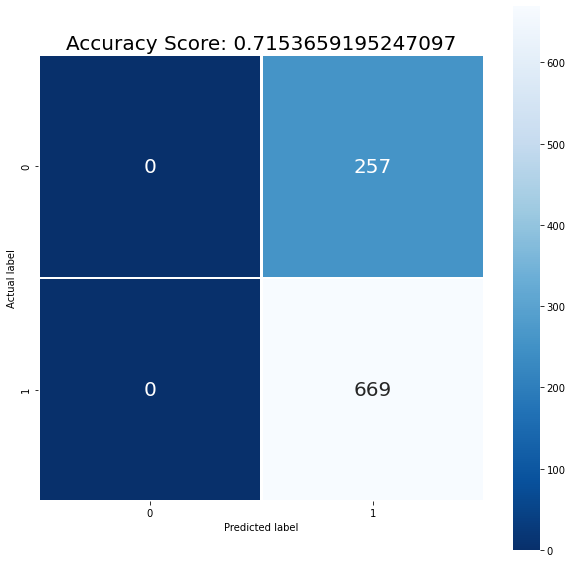

In [85]:
_ = plt.figure(figsize=(10,10))
_ = sns.heatmap(cm5, annot=True, fmt='d', linewidths=2, square = True, cmap = 'Blues_r', annot_kws={"fontsize":20});
_ = plt.ylabel('Actual label');
_ = plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score_train5)
_ = plt.title(all_sample_title, size = 20);

In [86]:
print(classification_report(Y5_test, y_pred5))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       257
           1       0.72      1.00      0.84       669

    accuracy                           0.72       926
   macro avg       0.36      0.50      0.42       926
weighted avg       0.52      0.72      0.61       926



C:\Users\zheng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


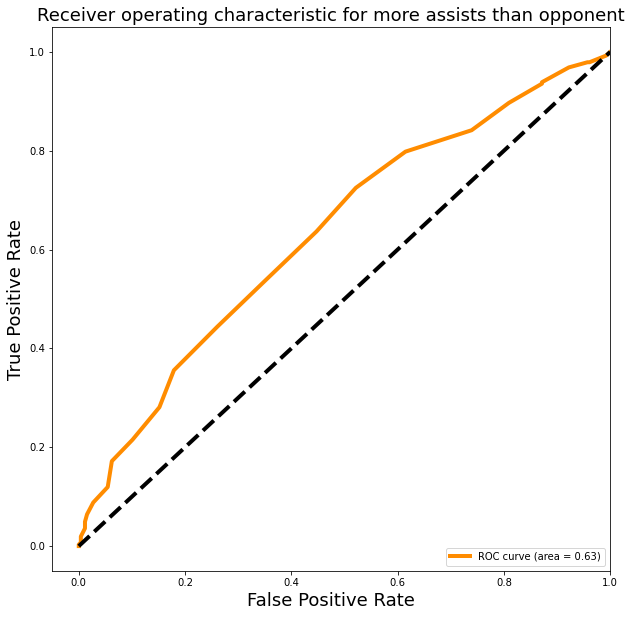

In [87]:
# For class 1, find the area under the curve
preds5 = gnb.predict_proba(X5_test)[:,1]
# Find fpr, tpr
fpr, tpr, _ = metrics.roc_curve(Y5_test, preds5)

# Find auc
roc_auc = metrics.auc(fpr, tpr)

# Plot of a ROC curve for class 1 (won the game)
plt.figure(figsize=[10,10])

# Plot fpr, tpr
plt.plot(fpr, tpr, color='darkorange', linewidth=4, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for more assists than opponent', fontsize=18)
plt.legend(loc="lower right")
plt.show()

Now I use GridSearch method

In [88]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
search_svm_nl = GridSearchCV(clf, svc_params, cv=5)
search_svm_nl #your optimised model

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1000, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [91]:
search_svm_nl.fit(X5_train, Y5_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1000, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [92]:
accuracy_train_score5a = search_svm_nl.score(X5_train, Y5_train)

In [93]:
y_pred5a = search_svm_nl.predict(X5_test)

In [94]:
cm5a = metrics.confusion_matrix(Y5_test, y_pred5a)

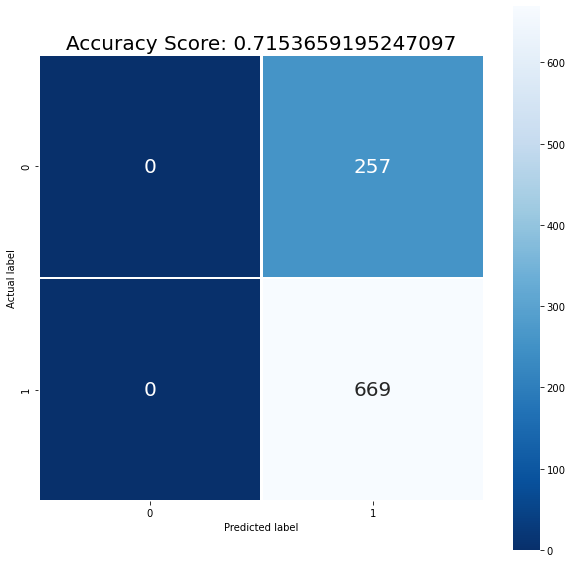

In [95]:
_ = plt.figure(figsize=(10,10))
_ = sns.heatmap(cm5, annot=True, fmt='d', linewidths=2, square = True, cmap = 'Blues_r', annot_kws={"fontsize":20});
_ = plt.ylabel('Actual label');
_ = plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_train_score5a)
_ = plt.title(all_sample_title, size = 20);

In [96]:
print(classification_report(Y5_test, y_pred5a))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       257
           1       0.72      1.00      0.84       669

    accuracy                           0.72       926
   macro avg       0.36      0.50      0.42       926
weighted avg       0.52      0.72      0.61       926



C:\Users\zheng\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


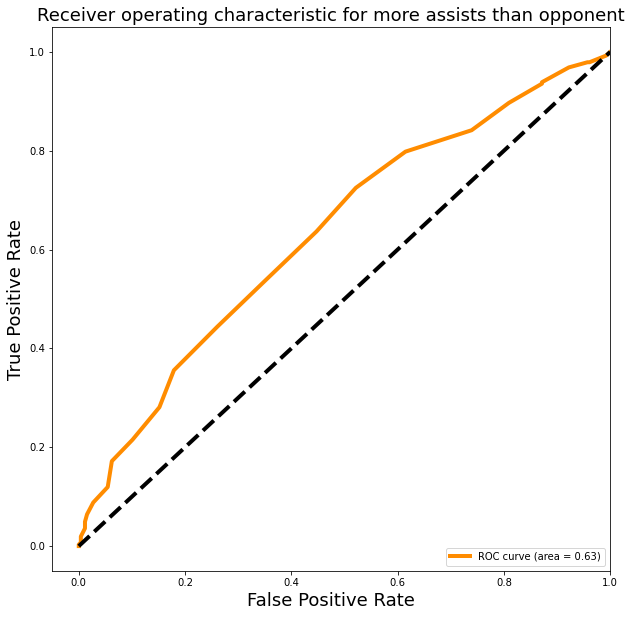

In [97]:
# For class 1, find the area under the curve
preds5a = search_svm_nl.predict_proba(X5_test)[:,1]
# Find fpr, tpr
fpr, tpr, _ = metrics.roc_curve(Y5_test, preds5)

# Find auc
roc_auc = metrics.auc(fpr, tpr)

# Plot of a ROC curve for class 1 (won the game)
plt.figure(figsize=[10,10])

# Plot fpr, tpr
plt.plot(fpr, tpr, color='darkorange', linewidth=4, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for more assists than opponent', fontsize=18)
plt.legend(loc="lower right")
plt.show()

https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates

Split into the 4 seasons

In [98]:
nba2014_15 = nba.loc['2014-10-28': '2015-4-15']
nba2015_16 = nba.loc['2015-10-27': '2016-4-13']
nba2016_17 = nba.loc['2016-10-25': '2017-4-12']
nba2017_18 = nba.loc['2017-10-17': '2018-4-11']


In [99]:
nba2014_15.describe()

,Assists,Opp.Assists,WINorLOSS_L,WINorLOSS_W
count,1.0,1.0,1.0,1.0
mean,19.0,22.0,1.0,0.0
std,NaN,NaN,NaN,NaN
min,19.0,22.0,1.0,0.0
25%,19.0,22.0,1.0,0.0
50%,19.0,22.0,1.0,0.0
75%,19.0,22.0,1.0,0.0
max,19.0,22.0,1.0,0.0


In [100]:
#https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/

In [101]:
nba_summary = { 
    "Season" : ['2000/01', '2001/02', '2002/03', '2003/04', '2004/05', '2005/06', '2006/07', '2007/08', '2008/09', '2009/10', '2010/11', '2011/12', '2012/13', '2013/14', '2014/15', '2015/16', '2016/17', '2017/18', '2018/19', '2019/20'],
    "Field Goal Attempts" : [80.6, 81.3, 80.8, 79.8, 80.3, 79.0, 79.7, 81.5, 80.9, 81.7, 81.2, 81.4, 82.0, 83.0, 83.6, 84.6, 85.4, 86.1, 89.2, 88.8],
    "3P Made" : [4.8, 5.2, 5.1, 5.2, 5.6, 5.7, 6.1, 6.6, 6.6, 6.4, 6.5, 6.4, 7.2, 7.7, 7.8, 8.5, 9.7, 10.5, 11.4, 12.2],
    "3PT Attempts" : [13.7, 14.7, 14.7, 14.9, 15.8, 16.0, 16.9, 18.1, 18.1, 18.1, 18.0, 18.4, 20.0, 21.5, 22.4, 24.1, 27.0, 29.0, 32.0, 34.1],
    "3PT %" : [0.354, 0.354, 0.349, 0.347, 0.356, 0.358, 0.358, 0.362, 0.367, 0.355, 0.358, 0.349, 0.359, 0.360, 0.350, 0.354, 0.358, 0.362, 0.355, 0.358]

    }

In [102]:
nba_summary = pd.DataFrame.from_dict(nba_summary)

In [103]:
nba_summary

,Season,Field Goal Attempts,3P Made,3PT Attempts,3PT %
0,2000/01,80.6,4.8,13.7,0.354
1,2001/02,81.3,5.2,14.7,0.354
2,2002/03,80.8,5.1,14.7,0.349
3,2003/04,79.8,5.2,14.9,0.347
4,2004/05,80.3,5.6,15.8,0.356
5,2005/06,79.0,5.7,16.0,0.358
6,2006/07,79.7,6.1,16.9,0.358
7,2007/08,81.5,6.6,18.1,0.362
8,2008/09,80.9,6.6,18.1,0.367
9,2009/10,81.7,6.4,18.1,0.355


In [104]:
nba_summary['2PT Attempts'] = nba_summary['Field Goal Attempts'] - nba_summary['3PT Attempts']

In [105]:
nba_summary

,Season,Field Goal Attempts,3P Made,3PT Attempts,3PT %,2PT Attempts
0,2000/01,80.6,4.8,13.7,0.354,66.9
1,2001/02,81.3,5.2,14.7,0.354,66.6
2,2002/03,80.8,5.1,14.7,0.349,66.1
3,2003/04,79.8,5.2,14.9,0.347,64.9
4,2004/05,80.3,5.6,15.8,0.356,64.5
5,2005/06,79.0,5.7,16.0,0.358,63.0
6,2006/07,79.7,6.1,16.9,0.358,62.8
7,2007/08,81.5,6.6,18.1,0.362,63.4
8,2008/09,80.9,6.6,18.1,0.367,62.8
9,2009/10,81.7,6.4,18.1,0.355,63.6


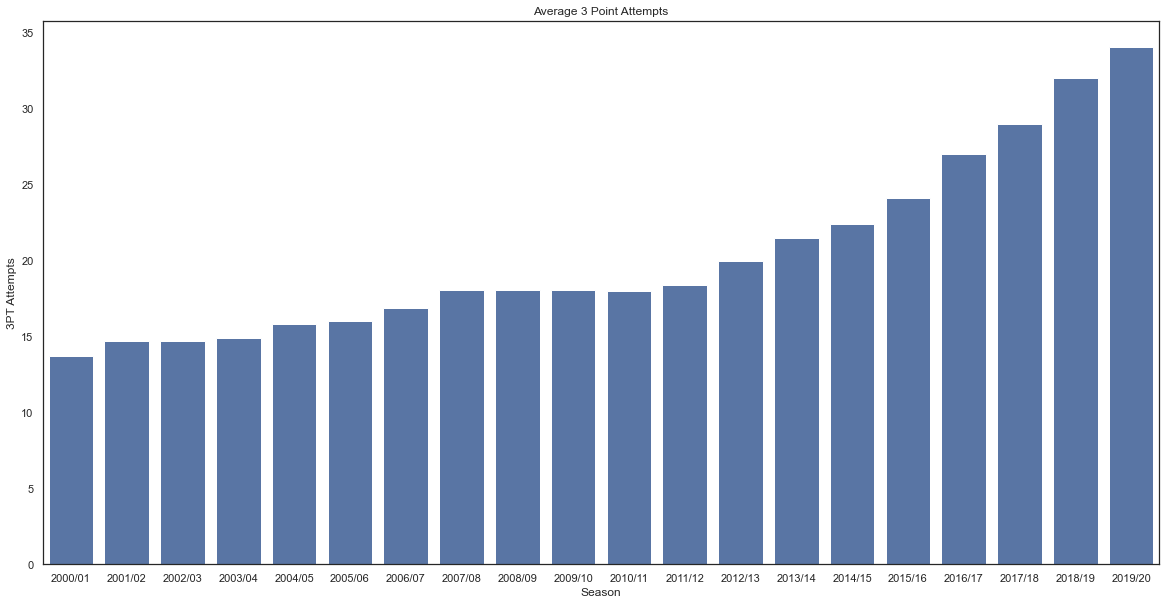

In [106]:
_ = sns.set(style="white", font_scale = 1)

_ = plt.figure(figsize=(20,10))

_ = ax = sns.barplot(x=nba_summary['Season'], y=nba_summary['3PT Attempts'], color="b", data=nba_summary).set_title("Average 3 Point Attempts")



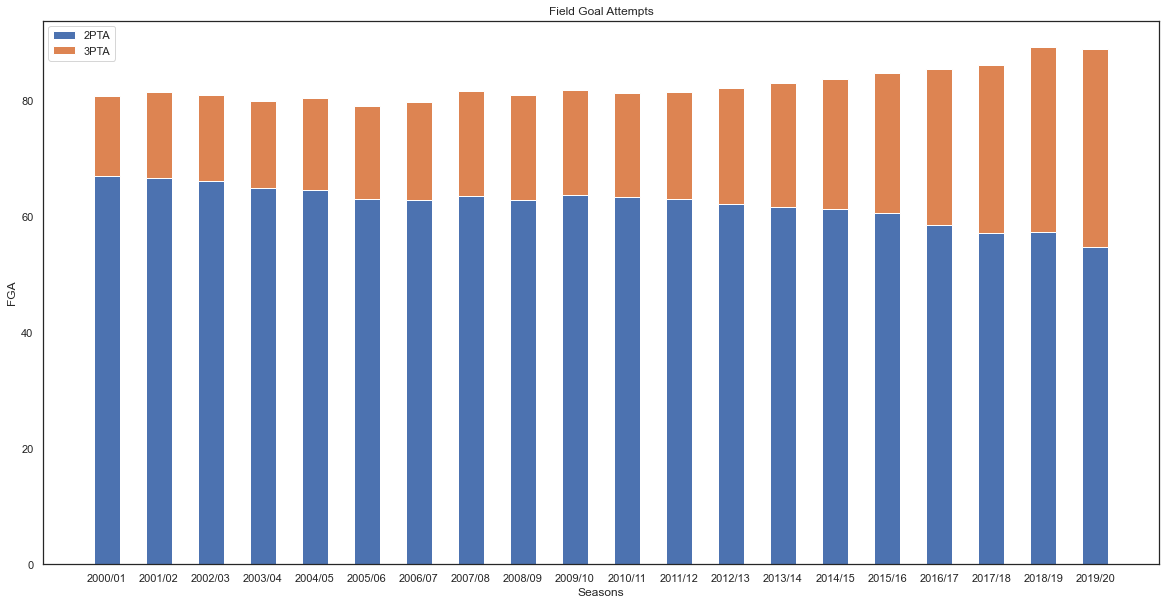

In [107]:
_ = plt.figure(figsize=(20,10))

N = 20
ind = np.arange(N) # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

_ = p1 = plt.bar(ind, nba_summary['2PT Attempts'], width)
_ = p2 = plt.bar(ind, nba_summary['3PT Attempts'], width, bottom=nba_summary['2PT Attempts'])


_ = plt.xlabel('Seasons')
_ = plt.ylabel('FGA')
_ = plt.xticks(np.arange(20), nba_summary['Season'])
_ = plt.title('Field Goal Attempts')
_ = plt.legend((p1[1], p2[1]), ('2PTA', '3PTA'))

_ = plt.show()